In [7]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sea
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
conn = duckdb.connect() # create an in-memory database

## Create duckdb object

In [ ]:
cur_time = time.time()
df = conn.execute("""
	SELECT *
	FROM './commodity_trade.csv'
""").df()
print(f"time: {(time.time() - cur_time)}")
print(df)
conn.register("df_view", df)
conn.execute("DESCRIBE df_view").df() 

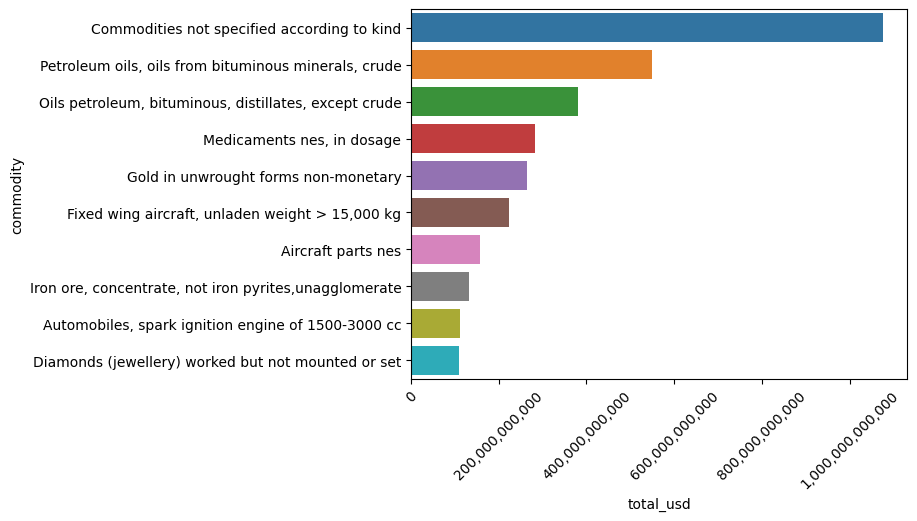

In [16]:

commodity_stats =conn.execute("""
             SELECT commodity,sum(trade_usd) as total_usd
               FROM df_view
               WHERE comm_code != 'TOTAL' and year =='2016'
               GROUP BY commodity 
               ORDER BY total_usd DESC
               LIMIT 10;
             """).df()
ax = sea.barplot(x='total_usd',y='commodity',data =commodity_stats)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

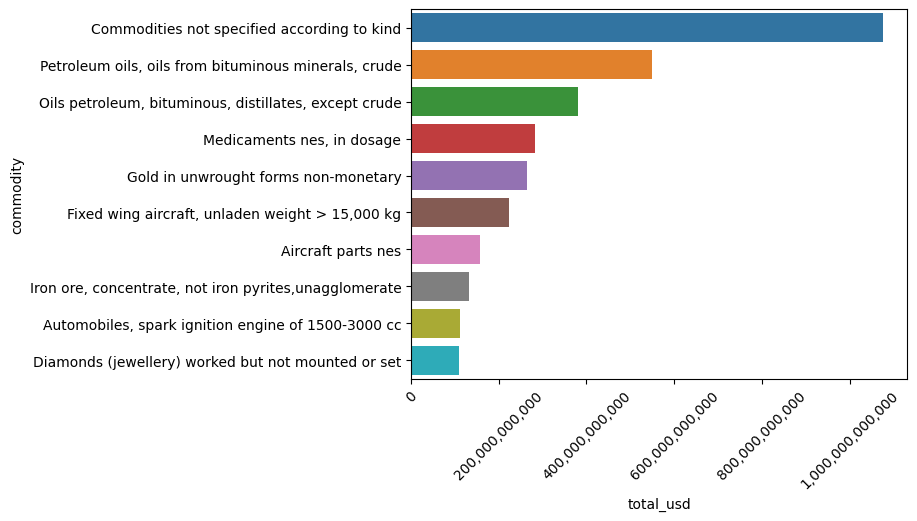

In [14]:
total_usd =conn.execute("""
             SELECT commodity,sum(trade_usd) as total_usd 
             FROM df_view
               WHERE comm_code != 'TOTAL' and year =='2016'
               GROUP BY commodity
               ORDER BY total_usd DESC
               LIMIT 10;
             """).df()
ax = sea.barplot(x='total_usd',y='commodity',data =total_usd)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()
            

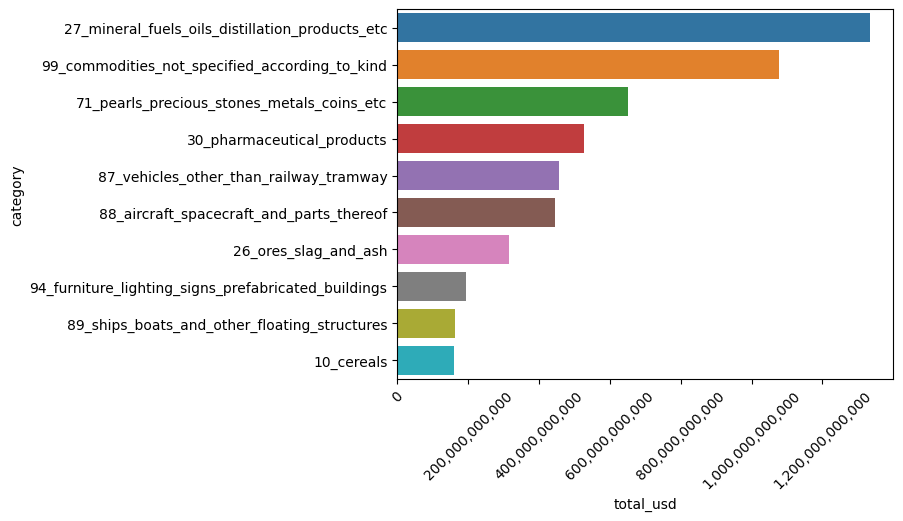

In [13]:
total_category =conn.execute("""
             SELECT category,sum(trade_usd) as total_usd 
             FROM df_view
               WHERE comm_code != 'TOTAL' AND year =='2016'
               GROUP BY category 
               ORDER BY total_usd DESC
               LIMIT 10
             """).df()
ax = sea.barplot(x='total_usd',y='category',data =total_category)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()
